# JOURNAL

In [39]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

## Read data

In [40]:
#df = pd.read_csv("data/raw_workouts/20220718.csv", header=0)

In [41]:
df = pd.DataFrame(columns=['Date', 'Exercise', 'Tool',
                           'Weight (kg)', 'Series','Reps', 'Rest',
                           'Duration', 'Order', 'Notes'])

In [42]:
logs_path = f"./data/raw/workouts/logs/"
for workout in os.listdir(logs_path):
    workout_path = f"{logs_path}{workout}"
    files_to_ignore = [".DS_Store", ".ipynb_checkpoints"]
    if any(file in workout_path for file in files_to_ignore):
        continue
    df_workout = pd.read_csv(workout_path, header=0)
    df = pd.concat(objs=[df, df_workout])

df = df.sort_values(by=["Date", "Order"], ascending=[False, True])

## Table

In [43]:
custom_layout = {"autosize": True,
                 #width=1000,
                 #height=500,
                 "margin": {
                   "l": 0,
                   "r": 0,
                   "b": 0,
                   "t": 0,
                  }
                  #paper_bgcolor="lightseagreen",}
                }

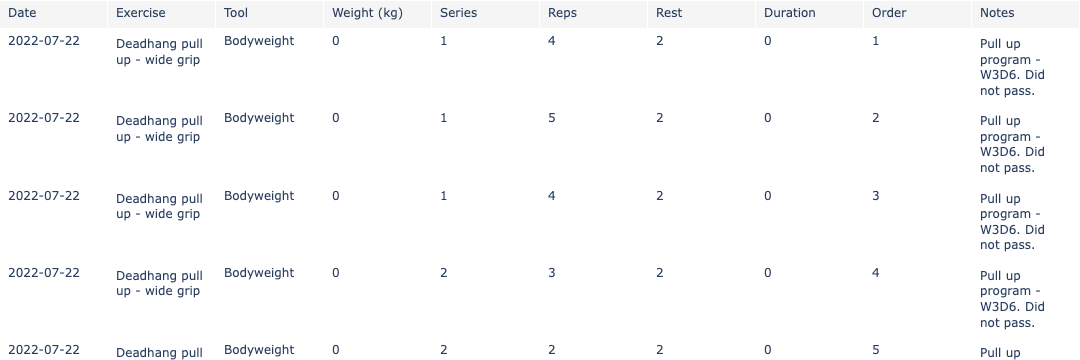

In [44]:
fig = go.Figure(data=[go.Table(
    header=dict(values=df.columns,
                fill_color="whitesmoke",
                align="left"),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color="white",
               align="left"))
])

fig.update_layout(custom_layout)

fig.show()

In [20]:
total_weight = (df["Weight (kg)"] * df["Series"] * df["Reps"]).sum()

In [ ]:
total_weight

In [ ]:
df.columns